In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import csv
import os 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, r2_score, roc_curve, auc
from sklearn.linear_model import LinearRegression
DATA_LOCATION = "data/vratari+novac.csv"

/home/lovro/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [5]:
df = pd.read_csv(DATA_LOCATION)

In [67]:
print("Sada ćemo Value prebaciti u broj(pogledaj kakav je u .csvu) - pretvoriti ga u strukturirani podatak ")

Sada ćemo Value prebaciti u broj(pogledaj kakav je u .csvu) - pretvoriti ga u strukturirani podatak 


In [68]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)

In [69]:
df.head()

,Overall,Value,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,90,68000000.0,13,11,15,29,13,12,13,14,...,11,70,27,12,18,86,92,78,88,89
1,89,58000000.0,15,14,11,36,14,17,18,12,...,25,69,25,13,10,87,85,88,85,90
2,89,53500000.0,14,14,13,33,12,13,19,20,...,27,66,20,18,16,85,91,72,86,88
3,89,38000000.0,15,13,25,55,11,30,14,11,...,47,70,17,10,11,90,86,91,87,87
4,88,30000000.0,12,10,10,36,12,12,12,14,...,23,69,25,10,13,87,86,69,89,89


In [70]:
print("Već sam ti ranije slao exp vezu između value i Overalla, td je ideja sljedece linije logaritmirati te podatke")

Već sam ti ranije slao exp vezu između value i Overalla, td je ideja sljedece linije logaritmirati te podatke


In [71]:
def log(x):
    return np.log10(x)
test=df[['Overall','Value']].copy()
test['logvalue'] = test['Value'].apply(log)

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


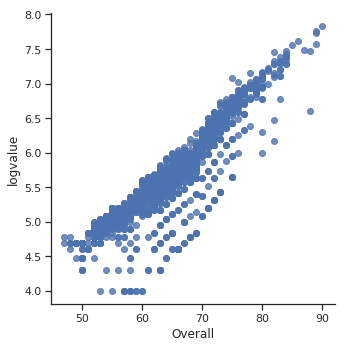

In [72]:
sns.lmplot('Overall','logvalue',data=test)

In [73]:
df['Value'].head(60)
print("Vidimo recimo da broj 57 ima vrijednost 0. Što nam stvara probleme kod logaritmiranja podataka... Kako bi to rješili dolje stvaramo nizove X i Y gdje takve probleme rješavamo...takve elemente brišemo")

Vidimo recimo da broj 57 ima vrijednost 0. Što nam stvara probleme kod logaritmiranja podataka... Kako bi to rješili dolje stvaramo nizove X i Y gdje takve probleme rješavamo...takve elemente brišemo


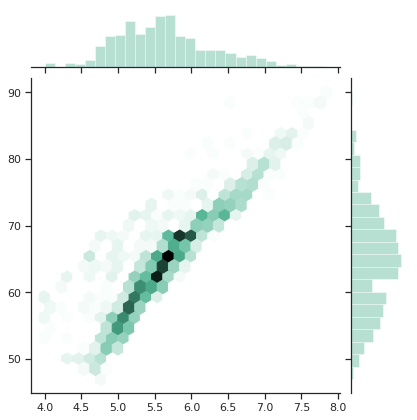

In [74]:
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = X
y = Y


sns.jointplot(x, y, kind="hex", color="#4CB391")


In [76]:
A = []
B = []
for i, k in enumerate(test['logvalue']):
    if k != float("inf") and k != float("-inf"):
        A.append(k)
        B.append(test['Overall'][i])
B

[90,
 89,
 89,
 89,
 88,
 88,
 87,
 86,
 85,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 82,
 82,
 82,
 82,
 82,
 82,
 82,
 82,
 82,
 81,
 81,
 81,
 81,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 73,
 73,


In [6]:

petpet="Reactions"
petses="GKDiving"
petsed="GKHandling"
petosa="GKKicking"
petdev="GKPositioning"
sesdes="GKReflexes"

In [7]:
X_train = df[[petpet,petses,petsed,petosa,petdev,sesdes]].values

In [8]:
y_train = df['Overall']

In [91]:
df.describe()

,Overall,Value,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1618.000000,1.618000e+03,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,...,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000
mean,64.692831,1.597766e+06,14.240420,12.037701,14.391224,27.320148,12.394932,13.834981,14.726205,14.523486,...,19.905439,45.321384,15.270705,14.067985,13.987021,65.331273,63.010507,61.627936,63.207046,66.100742
std,7.626579,4.432844e+06,4.009071,3.974929,3.966258,7.814333,4.293401,4.256679,4.643088,4.801541,...,6.657099,12.177081,5.623050,3.371873,3.400383,7.832920,7.433848,7.610738,8.781609,8.217761
min,47.000000,0.000000e+00,5.000000,4.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,...,5.000000,3.000000,3.000000,6.000000,3.000000,45.000000,43.000000,38.000000,38.000000,44.000000
25%,59.000000,1.400000e+05,12.000000,9.000000,12.000000,23.000000,9.000000,11.000000,12.000000,12.000000,...,15.000000,36.000000,11.000000,12.000000,12.000000,60.000000,58.000000,56.250000,58.000000,60.000000
50%,65.000000,3.750000e+05,13.000000,12.000000,14.000000,27.000000,12.000000,13.000000,14.000000,13.000000,...,20.000000,46.000000,14.000000,13.000000,13.000000,65.000000,63.000000,61.000000,63.000000,66.000000
75%,70.000000,9.500000e+05,16.000000,15.000000,16.000000,32.000000,15.000000,16.000000,17.000000,16.000000,...,23.000000,55.000000,19.000000,16.000000,16.000000,70.000000,68.000000,66.000000,69.000000,72.000000
max,90.000000,6.800000e+07,45.000000,27.000000,47.000000,66.000000,31.000000,32.000000,55.000000,72.000000,...,67.000000,71.000000,46.000000,33.000000,41.000000,90.000000,92.000000,91.000000,90.000000,90.000000


In [62]:
df.head()

,Overall,Value,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,90,68000000.0,13,11,15,29,13,12,13,14,...,11,70,27,12,18,86,92,78,88,89
1,89,58000000.0,15,14,11,36,14,17,18,12,...,25,69,25,13,10,87,85,88,85,90
2,89,53500000.0,14,14,13,33,12,13,19,20,...,27,66,20,18,16,85,91,72,86,88
3,89,38000000.0,15,13,25,55,11,30,14,11,...,47,70,17,10,11,90,86,91,87,87
4,88,30000000.0,12,10,10,36,12,12,12,14,...,23,69,25,10,13,87,86,69,89,89


In [9]:
regressor = LinearRegression()  
model=regressor.fit(X_train, y_train)

In [10]:
df1 = pd.read_csv("data/end_goalkeepers.csv")

In [11]:
X_test = df1[[petpet,petses,petsed,petosa,petdev,sesdes]].values
y_test = df1['Overall'].values

In [90]:
len(y_train)

1272

In [13]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
from sklearn.linear_model import Lasso, Ridge
y_pred = regressor.predict(X_test)

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2656906687394112
Mean Squared Error: 0.09959332434075989
Root Mean Squared Error: 0.31558410026609374


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


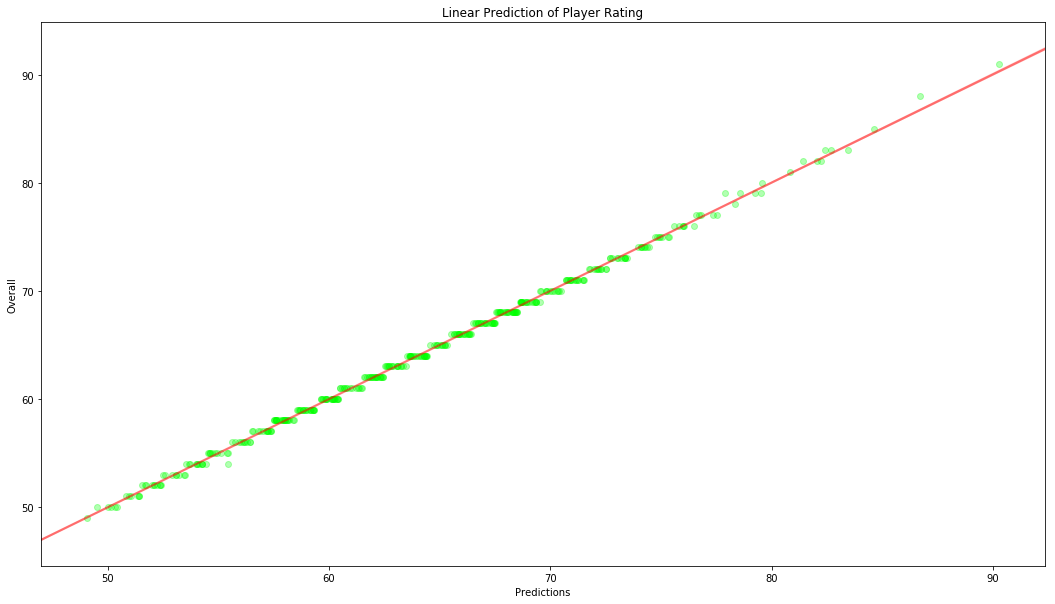

In [15]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(y_pred,y_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

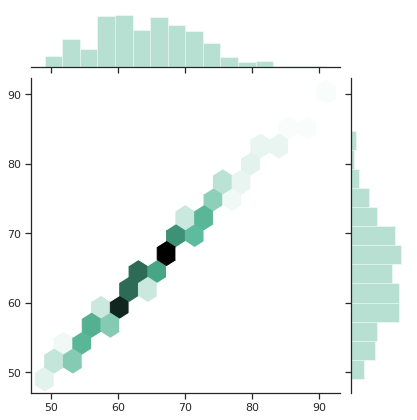

In [16]:
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = y_test
y = y_pred


sns.jointplot(x, y, kind="hex", color="#4CB391")


In [17]:
feature_cols=[petpet,petses,petsed,petosa,petdev,sesdes]
list(zip(feature_cols,regressor.coef_))

[('Reactions', 0.10851618795660753),
 ('GKDiving', 0.2115508782771754),
 ('GKHandling', 0.21390804893521106),
 ('GKKicking', 0.04945445444815684),
 ('GKPositioning', 0.20800881777711758),
 ('GKReflexes', 0.21085595734760137)]

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import  linear_model
r2_score(y_test, y_pred)

0.9982126211988462

In [ ]:
df['Value']=A.copy()